In [74]:
pip install praat-parselmouth

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


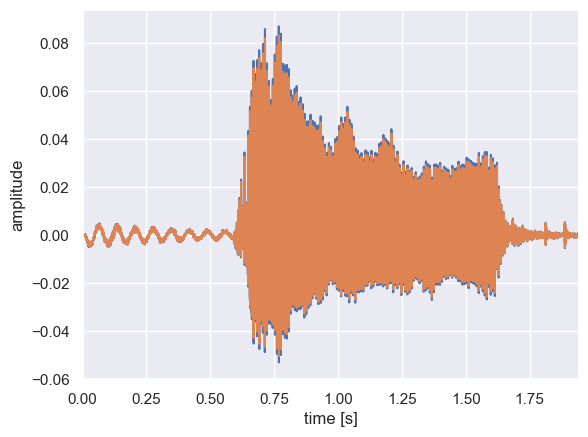

In [76]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load audio file
snd = parselmouth.Sound('../data/raw/test.wav')

sns.set()
plt.rcParams['figure.dpi']

plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [77]:
snd_part = snd.extract_part(from_time=0.9, preserve_times=True)

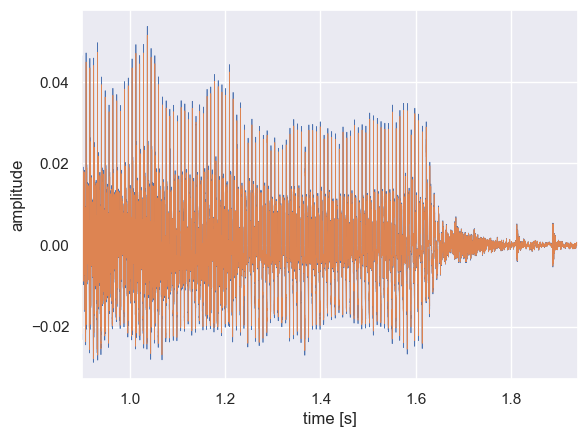

In [78]:
plt.figure()
plt.plot(snd_part.xs(), snd_part.values.T, linewidth=0.5)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [79]:
import glob
import numpy as np
import pandas as pd
import parselmouth 
import statistics


from parselmouth.praat import call
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
pitch = call(snd, "To Pitch", 0.0, 75, 600)
harmonicity = call(snd, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
hnr = call(harmonicity, "Get mean", 0, 0)
pointProcess = call(snd, "To PointProcess (periodic, cc)", 75, 500)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
localShimmer =  call([snd, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
localdbShimmer = call([snd, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq3Shimmer = call([snd, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
aqpq5Shimmer = call([snd, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq11Shimmer =  call([snd, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
ddaShimmer = call([snd, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

In [89]:
features = {
    'HNR': hnr,
    'Jitter_Local': localJitter,
    'Jitter_Local_Absolute': localabsoluteJitter,
    'Jitter_RAP': rapJitter,
    'Jitter_PPQ5': ppq5Jitter,
    'Jitter_DDP': ddpJitter,
    'Shimmer_Local': localShimmer,
    'Shimmer_Local_dB': localdbShimmer,
    'Shimmer_APQ3': apq3Shimmer,
    'Shimmer_APQ5': aqpq5Shimmer,
    'Shimmer_APQ11': apq11Shimmer,
    'Shimmer_DDA': ddaShimmer
}

df = pd.DataFrame([features])

In [90]:
df.head()

,HNR,Jitter_Local,Jitter_Local_Absolute,Jitter_RAP,Jitter_PPQ5,Jitter_DDP,Shimmer_Local,Shimmer_Local_dB,Shimmer_APQ3,Shimmer_APQ5,Shimmer_APQ11,Shimmer_DDA
0,14.967827,0.00845,0.000066,0.003708,0.004168,0.011123,0.066526,0.585677,0.030759,0.039592,0.05527,0.092277
